# Imports

In [1]:
import sys
sys.path.append('..')
from constants import *
from src.visualization.visualize import *
from src.models.HawkesEM import EMHawkes
from src.simulation.simulateHawkes import *
from src.data.dataLoader import loadData
pd.set_option('display.max_rows', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Data Import an Preprocessing

In [2]:
nrTrainingDays =55
nrTestDays =8
myConfig = EMConfig("config_allMobility_cantonPop_popDensity_future_muRegression_lasso_1")
data = loadData(nrTrainingDays, nrTestDays, myConfig)
numberRegions = data.casesTrain.shape[0]

# EM

In [3]:
alphas, betas, mus, R0s, poisson_results = EMHawkes(1, nrTrainingDays, data, myConfig)


/Users/amrayschwabe/venv/predictingcovidspread/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1323: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


# Simulation

In [5]:
R0pred, covariatesTest = predR0(data.covariatesTrain, data.covariatesTest, myConfig.covariatesNames, poisson_results, predMode =myConfig.predMode)
muPred, _ = predMu( data.covariatesTrain,data.covariatesTest, mus,config=myConfig,daysToPredict= nrTestDays)

In [6]:
movement = pd.read_csv(movementPath, index_col="Unnamed: 0")
simResultsInfected, simResultsSpreading = simHawkesAllRepetitions(data.casesTrainSpreading, None, muPred, alphas, betas, R0pred, nrTrainingDays, nrTestDays, 3, myConfig, movement=movement)


# Visualization

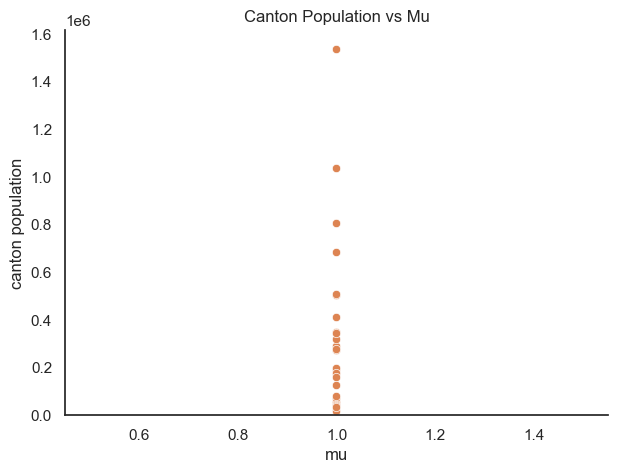

In [7]:
#plot mu
plotMu(np.mean(muPred, axis=1), data.dataAll['canton_pop'].unique())

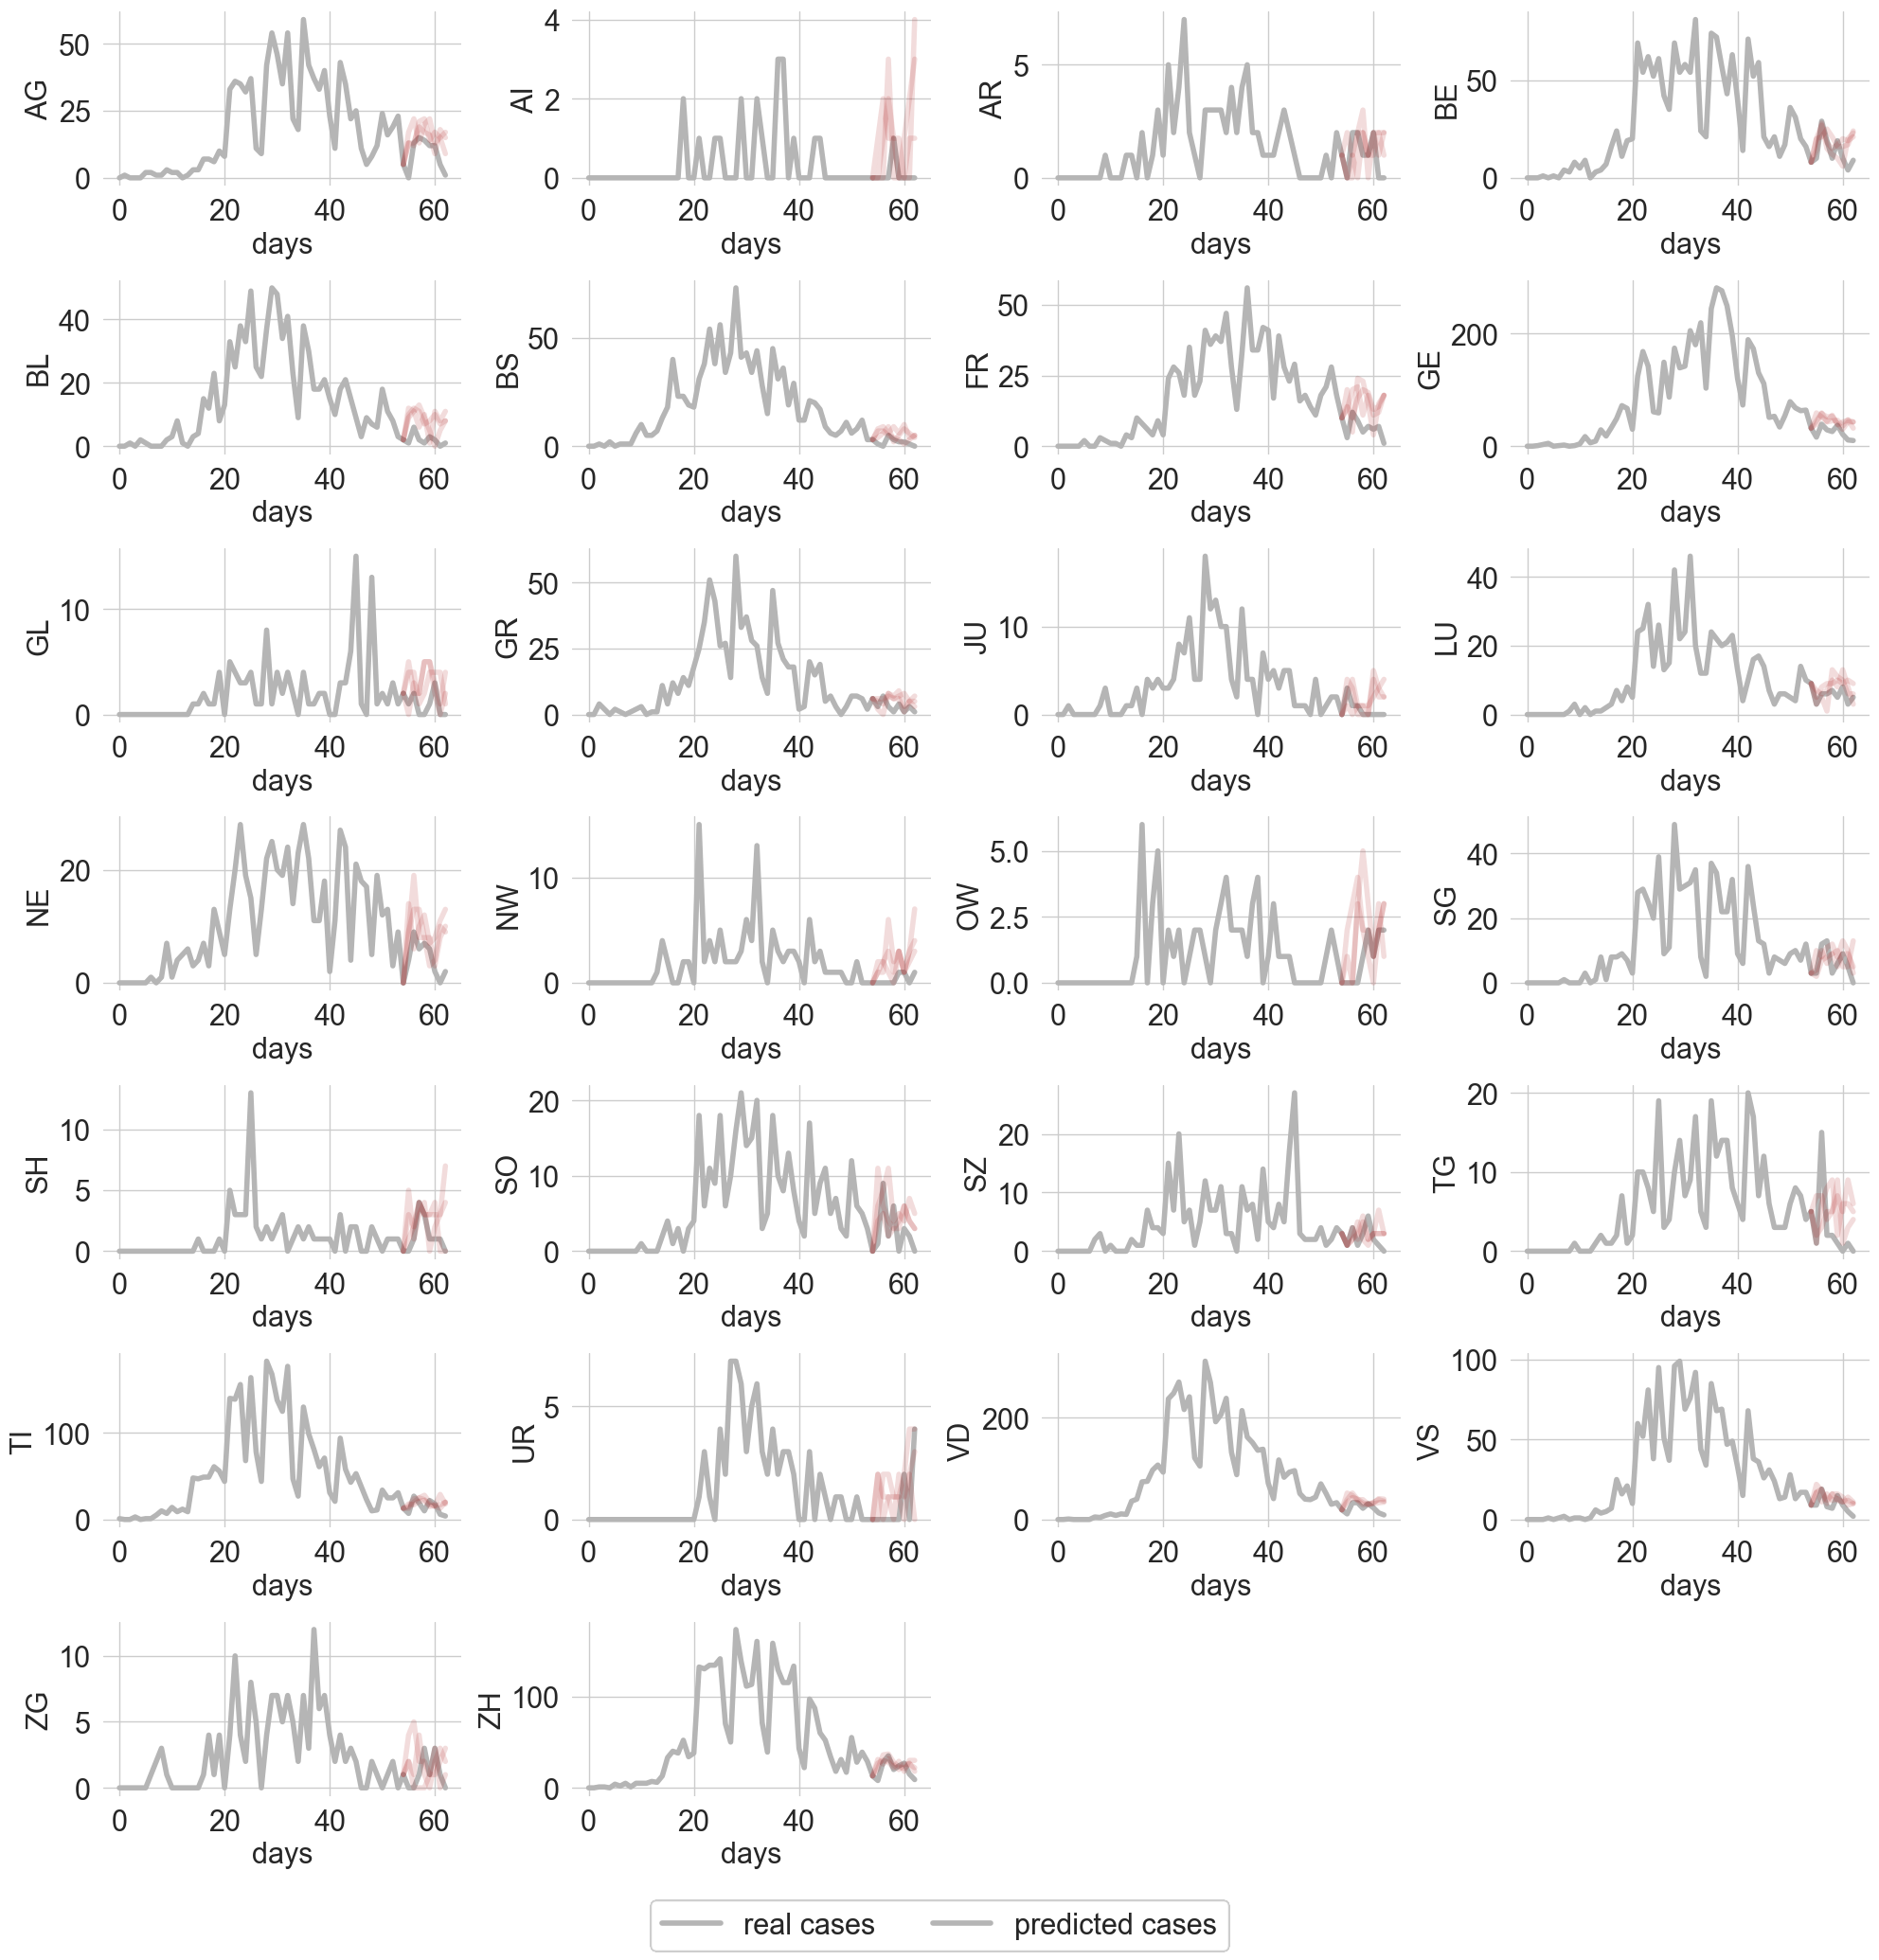

In [8]:
plotAllCantons(simResultsInfected, data.casesTrain, data.casesTest)

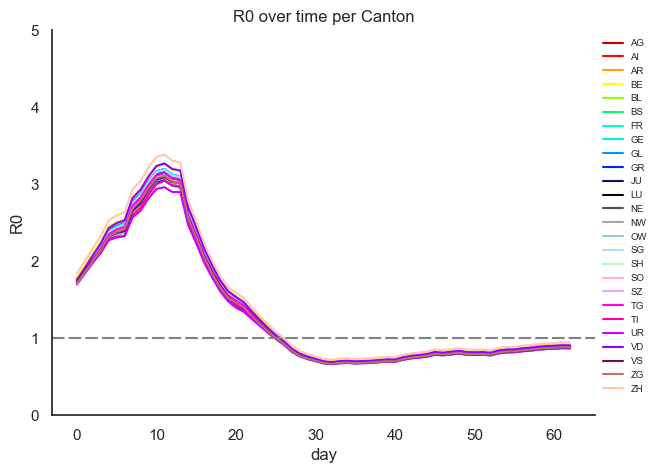

In [9]:
plotR0(R0pred, data.dataAll['canton_codes'].unique())
plt.show()


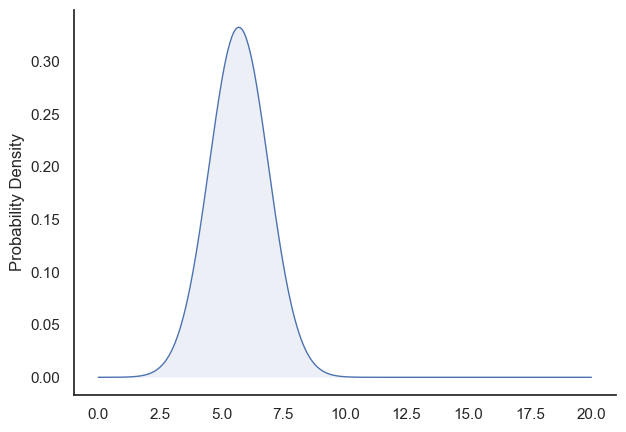

In [10]:
plotKernel(alphas[0],betas[0]) 

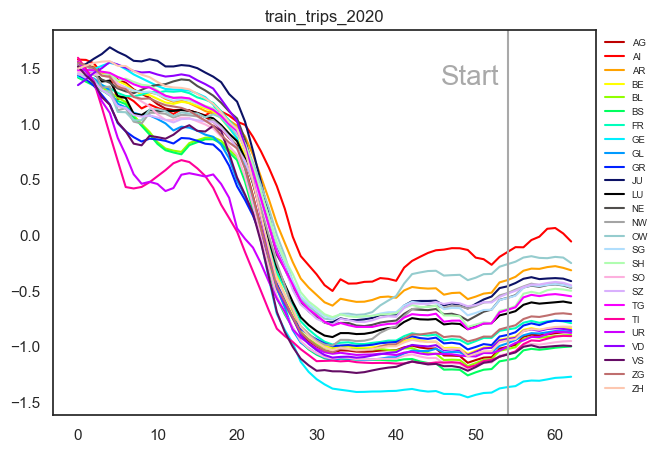

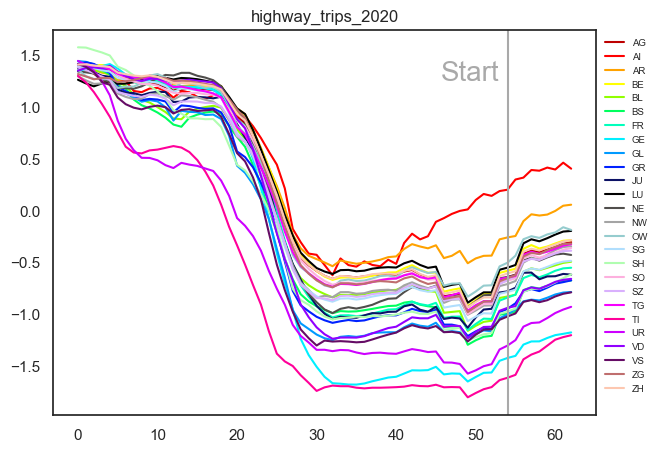

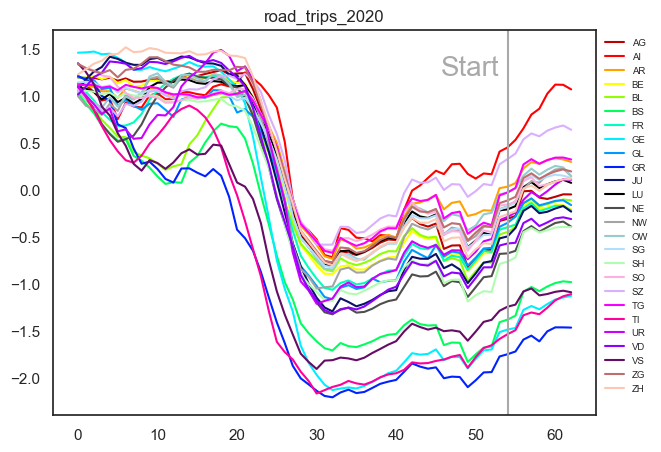

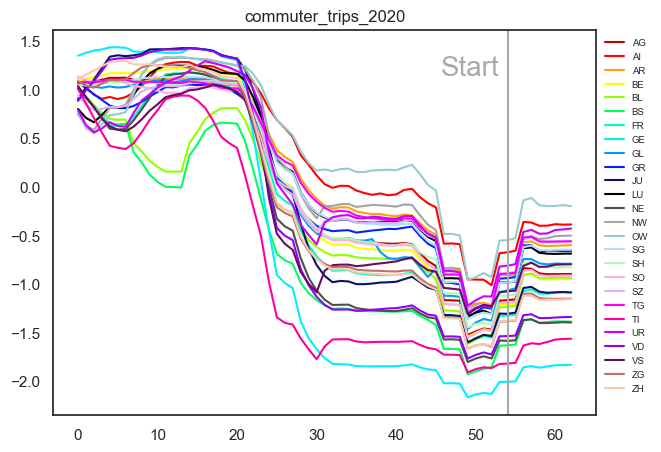

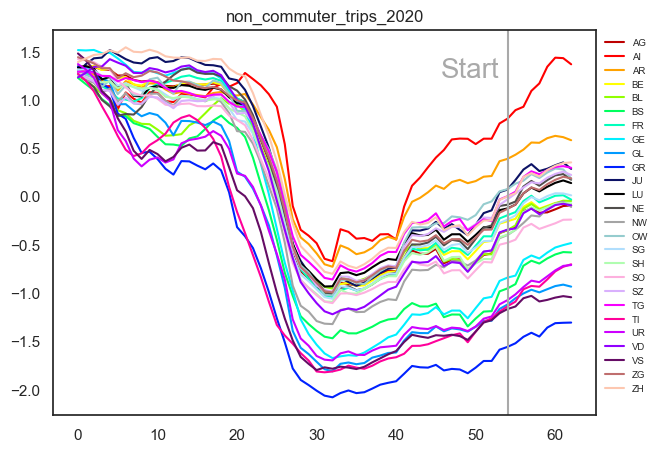

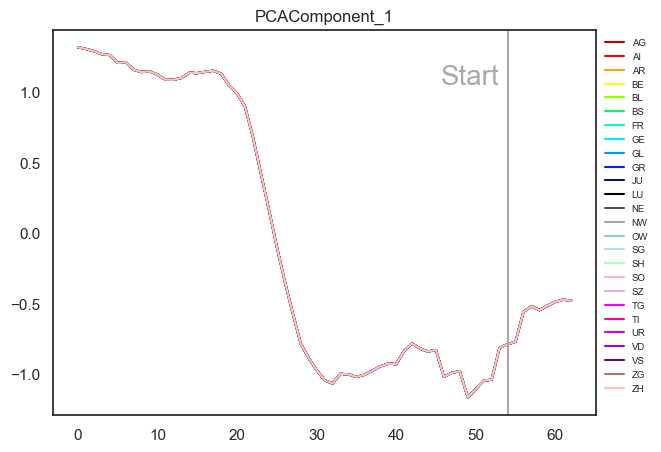

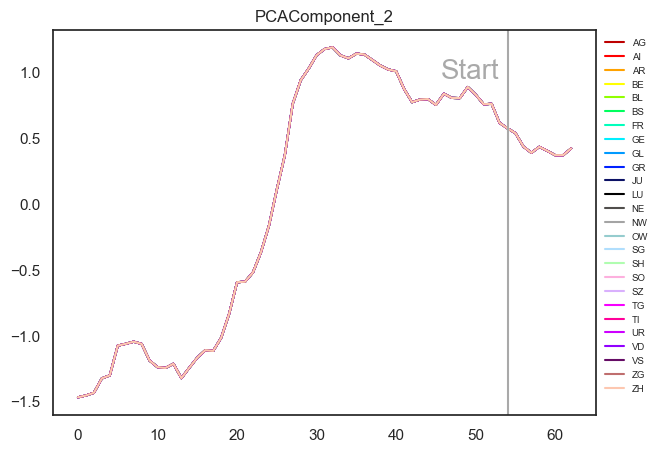

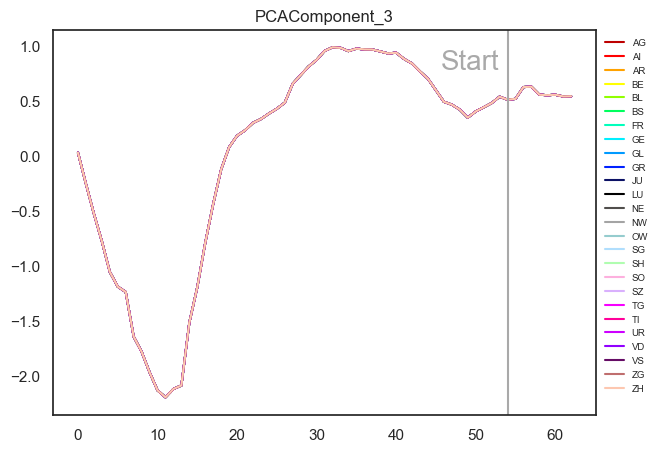

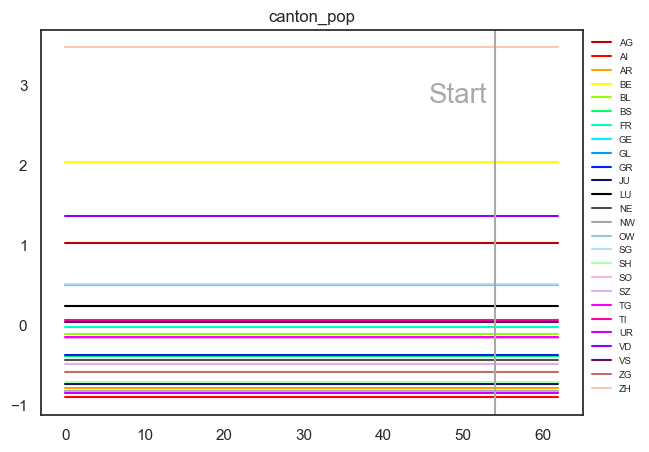

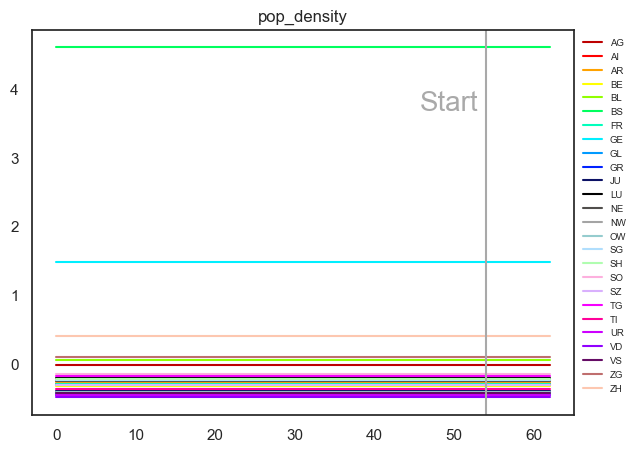

In [11]:
plotCovariates(data.covariatesTrain, covariatesTest, nrTrainingDays, nrTestDays, data.dataAll['canton_codes'].unique())